Algoritmos

In [30]:
def unique_Naive(L): #n^2
  print("unique_Naive(L): complexidade n^2")
  for i in range(0, len(L)-1):
    for j in range(i+1, len(L)):
      #print(L[i],L[j])
      if (L[i]==L[j]):
        return False
  return True

def unique_Sort(L): #nlog(n)
  print("unique_Sort(L): complexidade nlog(n)")
  L.sort()
  for i in range(1, len(L)):
    #print(L[i-1], L[i])
    if (L[i-1] == L[i]):
      return False
  return True

def unique_Hash(L): #n
  print("unique_Hash(L): complexidade n")
  Hash = set()
  for i in range(0, len(L)):
    #print(L, Hash)
    if L[i] in Hash:
      return False
    Hash.add(L[i])
  return True
  

Teste simples


In [27]:
A = [5, 2, 3, 4, 1]
unique_Naive(A)
unique_Sort(A)
unique_Hash(A)

unique_Naive(L): complexidade n^2
5 2
5 3
5 4
5 1
2 3
2 4
2 1
3 4
3 1
4 1
unique_Sort(L): complexidade nlog(n)
1 2
2 3
3 4
4 5
unique_Hash(L): complexidade n
[1, 2, 3, 4, 5] set()
[1, 2, 3, 4, 5] {1}
[1, 2, 3, 4, 5] {1, 2}
[1, 2, 3, 4, 5] {1, 2, 3}
[1, 2, 3, 4, 5] {1, 2, 3, 4}


True

Coleta de dados dos experimentos

In [39]:
import time
from numpy import random
##Você deve escolher um valor mais adequado
DOMAIN = 1000000000 #1B 
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
 
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [unique_Naive, unique_Sort, unique_Hash]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 15

##você deve escolher tamanhos mais adequados
##sizes 10K, 15K, 20K, 25K, 30K, 35K
sizes = [10000,15000,20000,25000,30000,35000]
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=10000, each experiment has 15 rounds.
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Naive(L): complexidade n^2
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
unique_Sort(L): complexidade nlog(n)
u

Formata os dados do experimento para serem exibidos

In [40]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
unique_Naive##10000,4.771182,unique_Naive,10000
unique_Sort##10000,0.004470,unique_Sort,10000
unique_Hash##10000,0.002544,unique_Hash,10000
unique_Naive##15000,10.203328,unique_Naive,15000
unique_Sort##15000,0.007717,unique_Sort,15000
unique_Hash##15000,0.003682,unique_Hash,15000
unique_Naive##20000,16.132257,unique_Naive,20000
unique_Sort##20000,0.009519,unique_Sort,20000
unique_Hash##20000,0.005596,unique_Hash,20000
unique_Naive##25000,23.172006,unique_Naive,25000


Resultado do experimento (gráfico)

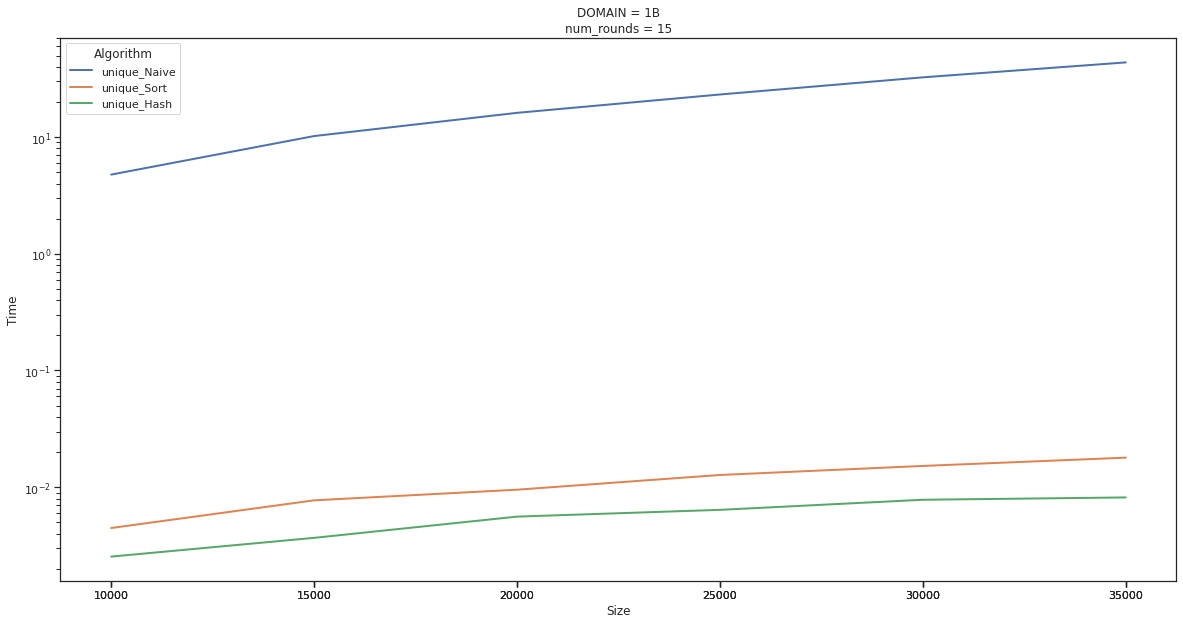

In [46]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.title("DOMAIN = 1B\nnum_rounds = 15")
plt.show()